# Tarea 2
# Curso de Reconocimientos de formas y visión por computadora

## Preparación de una imagen (carga, histograma, escala de grises y binarización de una imagen)

En esta parte se usó una imagen sencilla para aplicar los conocimientos adquiridos. Iniciamos con las importaciones de algunas librerías como cv2, numpy, scipy y matplotlib que sirven para trabajar con imagenes, hacer calculos y graficar los resultados.

Lo siguiente es cargar la imagen, usaremos cv2, aqui hay que tener en cuenta un detalle importante y es que cv2 trabaja con una combinación de colores BGR, esto nos podría alterar la imagen de una manera no adecuada, la solucion es usar la función "cv2.COLOR_BGR2RGB" que nos permite hacer la conversión de colores que usamos normalmente.

In [1]:
# Importaciones para la resolución de este problema
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

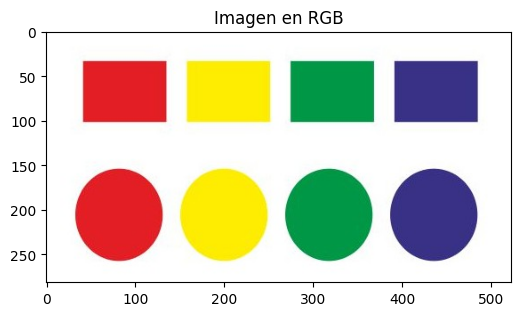

In [2]:
#Leyendo imagen
imagen = cv2.imread('./Resources/formas.jpg')
#Poniendo color RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#Graficando la imagen
plt.figure(dpi=100)
plt.title("Imagen en RGB")
plt.imshow(imagen_rgb)
plt.show()

Lo siguiente es calcular el histograma de la imagen, estos son distribuciones que describen la frecuencia con las que se presentan los valores de intensidad (pixeles) de una imagen. Tomando como ejemplo una imagen tipica a escala de grises de 8 bits el histograma adoptara valores comprendidos entre 0 y 255 ya que 2ˆ8=256. Cada valor del histograma contiene el numero de pixeles correspondientes a esa intensidad.
El histograma muestra importantes caracteristicas de una imagen:
Por ejemplo el contraste y el rango dinamico.

Para esto creamos un conjunto de datos y el intervalo deseado, en donde pasamos nuestro rango de datos. Como calcularemos el histograma de una imagen a color, cada color tiene una representacion de 256 bits esto se multiplica por 3 que sería un total de 768 y se multiplica por el rango de color que es de 256. Lo que nos da un total de 196,608 cantidad de pixeles.

Para graficarlo, matplotlib nos da una función para graficar histogramas, esta función es "plt.hist()" pasando los parametros anteriormente mencionados.

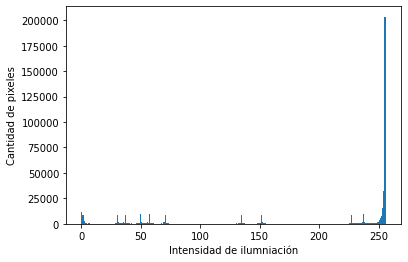

In [3]:
#Calculando su histograma
histograma = cv2.imread('./Resources/formas.jpg')
plt.hist(histograma.ravel(), 256, [0, 256])
plt.xlabel("Intensidad de ilumniación")
plt.ylabel("Cantidad de pixeles")
plt.show()

### Conversion a escala de grises

Lo siguiente para trabajar con la imagen es convertirla a escala de grises y binarizarla. 
Lo primero es convertir la imagen original con la función "cv2.cvtColor", recordando que cv2 trabaja con la configuración BGR, por lo tanto, para convertir a escala de grises es necesario la función COLOR_BGR2GRAY.

### Filtrado de imagen usando campana de Gauss

Lo siguiente que vamos a ocupar mas adelante, es suavizar la imagen mediante el filtrado de ruido, usando un filtro gaussiano ya que nos da una aproximación de como ve el ojo humano.
cv2 nos ayuda aplicar este filtro con la función "cv2.GaussianBlur", esta función recibe los siguientes parametros:
* imagen: es la imagen original a la que queremos aplicarle el filtro.
* (n * n): es una mascara de convolución o kernel, siempre tiene que ser impar
* sigma: representa la desviación estandar en el eje X, es decir, la anchura de la campana de Gauss. Si se pone un 0, openCV se encargará automaticamente de de calcular ese valor para el kernel o máscara que hemos elegido.

Por último, graficamos la imagen resultante aplicando la escala de grises y el filtro gaussiano.

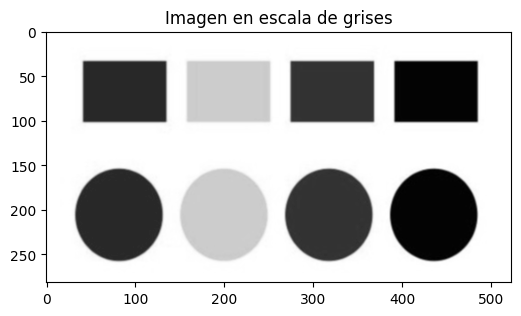

In [4]:
#Escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(imagen_gris, (3,3), 0)
#Graficando
plt.figure(dpi=100)
plt.title("Imagen en escala de grises")
plt.imshow(gauss, cmap='gray')
plt.show()

Lo siguiente es binarizar la imagen usando el algoritmo de Otsu, solo para poner en práctica lo visto en clase. Esta técnica es antigua, fue de las primeras en crearse ya que nos ayudaba a trabajar con imagenes 8 veces mas pequeñas ya que trabaja con blanco y negro. Cv2 nos ayuda a aplicar la binarización de las imagenes con la función "cv2.threshold", donde se requiere lo siguiente:
* Imagen: imagen origial a la cual se va aplicar la binarización.
* Umbral inicial: es el valor que comprende de 0 a 255 para aplicar el umbral inicial.
* Umbral máximo: es el valor que comprende de 0 a 255 para aplicar el umbral final.
* Función de binarización: cv2 nos permite usar distintas funciones de binarizacion y sumarlas, como podemos ver en el ejemplo, podemos sumar una funcion de binarización y la funcion de umbral.

El unico desperfecto de usar este tipo de binarización es que para colores muy brillantes como el amarillo claro, no puede ser reconocido como un color diferente a blanco y al aplicar las funciones deseadas, las figuras que tenga ese tipo de colores, no se reconocerán.

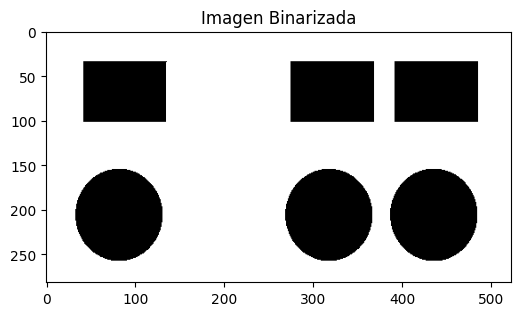

In [5]:
#Binarizando imagen con algoritmo Otsu
gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
ret, img_bin = cv2.threshold(gray,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(dpi=100)
plt.title('Imagen Binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)
plt.show()

## Colores HSV y máscaras.

### Trabajando con colores HSV

Para ello necesitamos definir una máscara que funcionará como filtro del resto de los colores que no queremos detectar.

Necesitamos los valores de variación de cada canal, y abarcar un rango del espacio de colores en HSV. Es decir, por ejemplo, que H varíe de 0 a 10, que S varíe de 100 a 255, y V de 100 a 255, para detectar un color rojo/naranja. Si esto parece confuso, no te preocupes, lo vamos a ver en el ejemplo que sigue.
La mejor forma que encontré para hallar un color que necesito es a través de esta imagen, donde se muestra la variación de colores, con H en el eje “x”, y S en el eje “y”, y V = 255.

Para entender mejor como funciona esta familia de colores, se muestra en la siguiente imagen, los rangos de valores en los que se encuentran los colores.

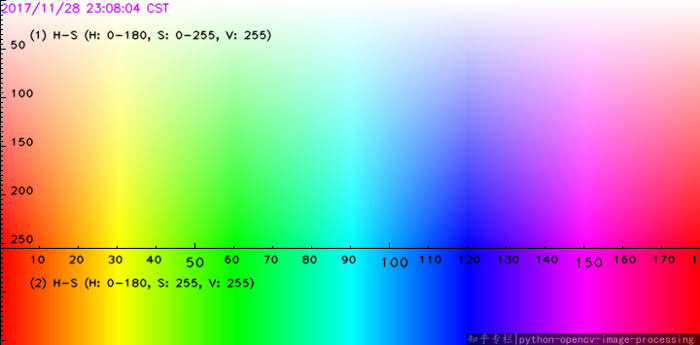

A continuación veremos la imagen con los colores HSV.

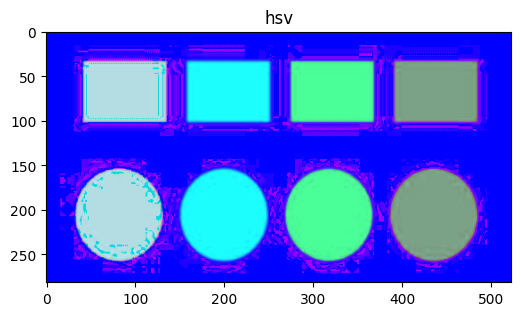

In [6]:
#Covnersion a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)
#Graficando
plt.figure(dpi=100)
plt.title('hsv')
plt.imshow(imagen_hsv)
plt.show()

A continuación crearemos las mascaras de todos los colores que tiene la imagen original. Solo explicaré la primera ya que a todas es el mismo procedimiento.

Con ayuda de la imagen de los rangos de colores HSV haremos los rangos de los umbrales: H que inicia con un valor aprox de 170 y termina en 179, S lo dejamos en 100 para que llegue a 255 y V de 100 a 255.

La función inRange recibe 3 parámetros: la imagen y los dos umbrales. Esto nos regresa una máscara con valores 1 donde detectó el color elegido y 0 donde no lo encuentra.

Lo siguiente es filtrar la imagen con la funcion bitwise 
-and, que básicamente es una operacion AND con los valores de la imagen original. Esto regresa las imagenes transformadas en arreglos numpy.

Como resultado nos regresa la imagen original filtrada con la máscara. La imagen de la izquierda representa la máscara creada y la imagen de la derecha es la imagen original filtrada.

In [7]:
# Elegimos el umbral de rojo en HSV
umbral_bajo_rojo = (170,100,100)
umbral_alto_rojo = (179,255,255)
# hacemos la mask y filtramos en la original
mask_red = cv2.inRange(imagen_hsv, umbral_bajo_rojo, umbral_alto_rojo)
res = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask = mask_red)

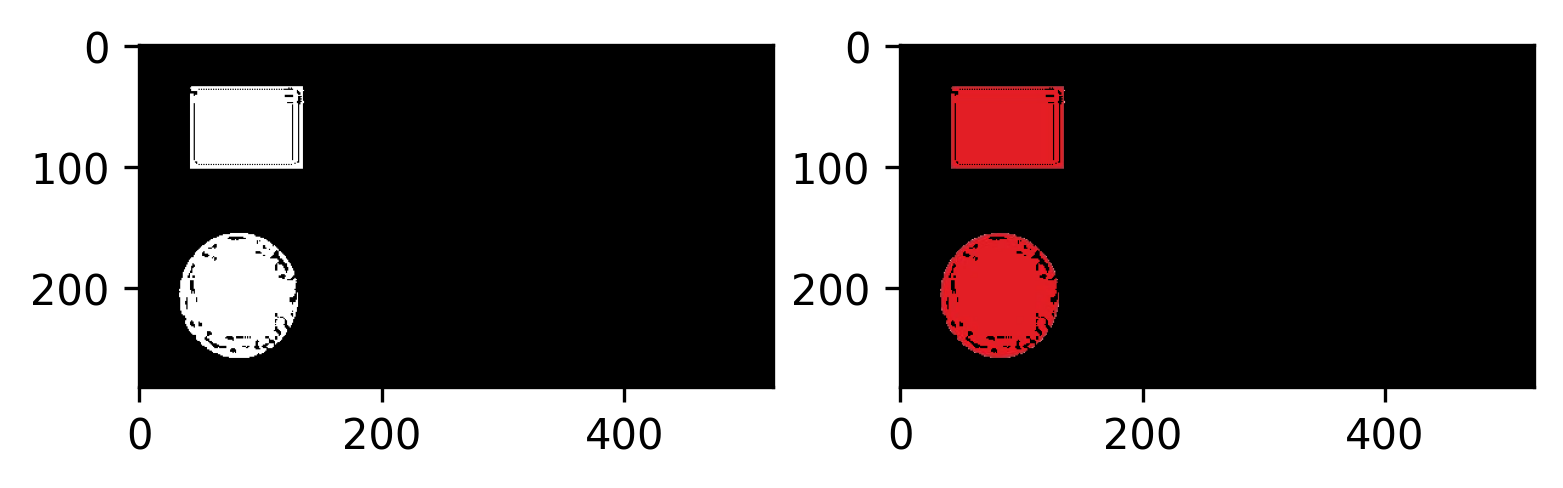

In [8]:
plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [9]:
# Elegimos el umbral de amarillo en HSV
umbral_bajo_amarillo = (25,100,100)
umbral_alto_amarillo = (31,255,255)
# hacemos la mask y filtramos en la original
mask_amarillo = cv2.inRange(imagen_hsv, umbral_bajo_amarillo, umbral_alto_amarillo)
res = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask_amarillo)

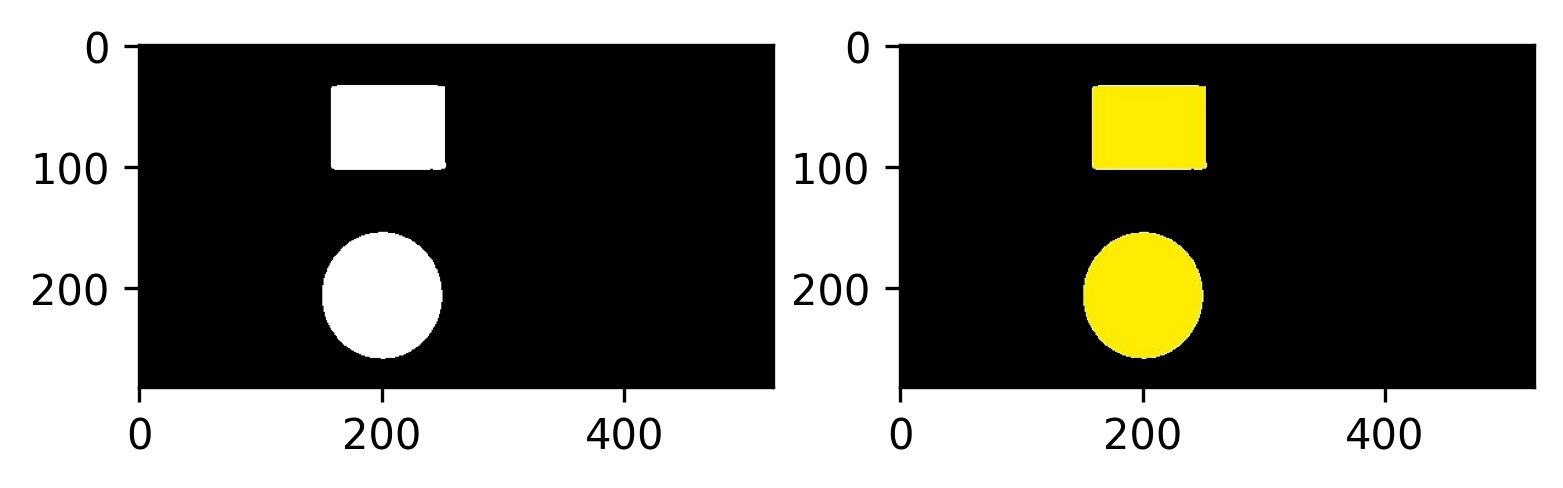

In [10]:
plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(mask_amarillo, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [11]:
#Creando una màscara
# Elegimos el umbral de verde en HSV
umbral_bajo_verde = (70,100,100)
umbral_alto_verde = (80,255,255)
# hacemos la mask y filtramos en la original
mask_verde = cv2.inRange(imagen_hsv, umbral_bajo_verde, umbral_alto_verde)
res = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask_verde)

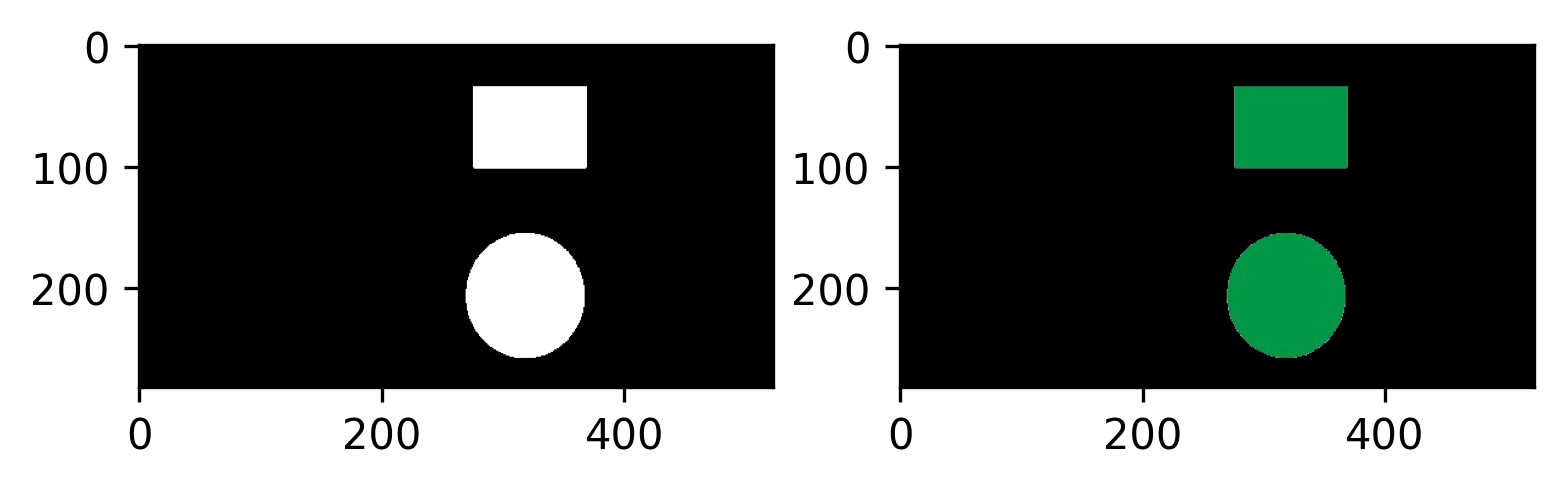

In [12]:
# imprimimos los resultados
plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(mask_verde, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [13]:
# Elegimos el umbral de amarillo en HSV
umbral_bajo = (105,100,100)
umbral_alto = (130,255,255)
# hacemos la mask y filtramos en la original
mask = cv2.inRange(imagen_hsv, umbral_bajo, umbral_alto)
res = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

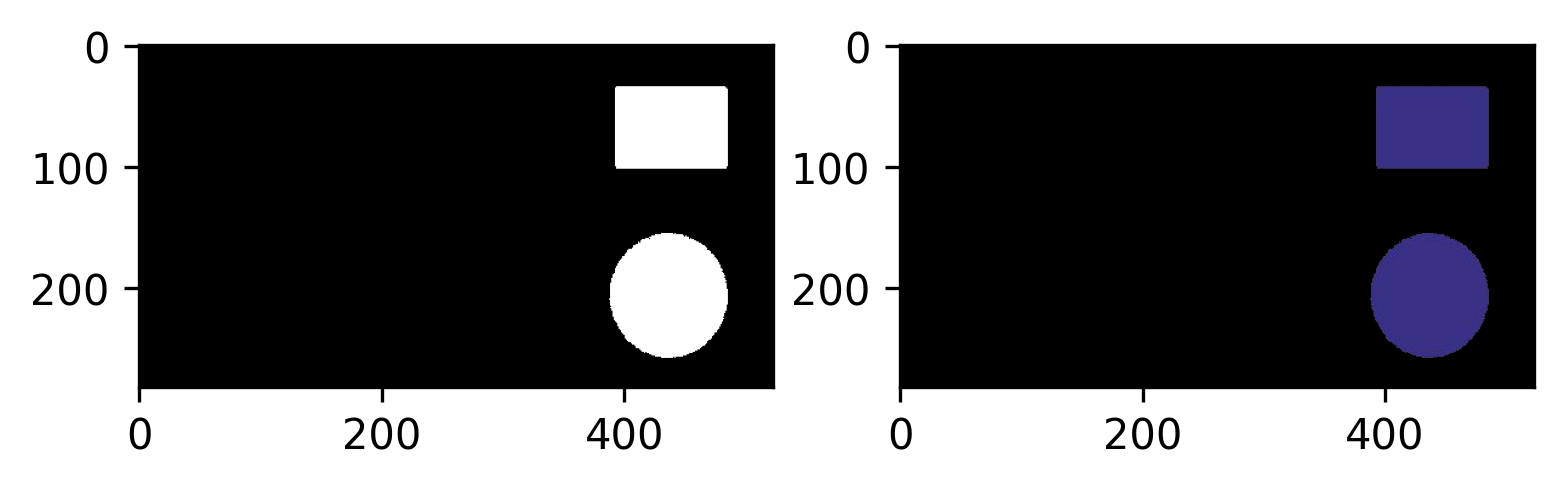

In [14]:
plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

Como podemos observar, la imagen filtrada con la máscara de color rojo algunos pixeles no se llegaron a detectar con la máscara. Esto es porque en el rango del rojo en HSV, tenemos que contemplar tanto el inicio como el final del umbral de colores, con los valores de H.

Para poder obtener los pizeles restantes haremos dos mascaras que contemplen la parte más baja de H y luego sumarlas esto se puede gracias al poder de la librería cv2. Dando como resoltado el siguiente código.

In [15]:
# Haciendo correcciones a las imagenes en color rojo
# Elegimos el umbral de rojo en HSV
umbral_bajo1 = (170,100,100)
umbral_alto1 = (179,255,255)
# Elegimos el segundo umbral de rojo en HSV
umbral_bajo2 = (0,100,100)
umbral_alto2 = (10,255,255)
# hacemos la mask y filtramos en la original
mask1 = cv2.inRange(imagen_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv2.inRange(imagen_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

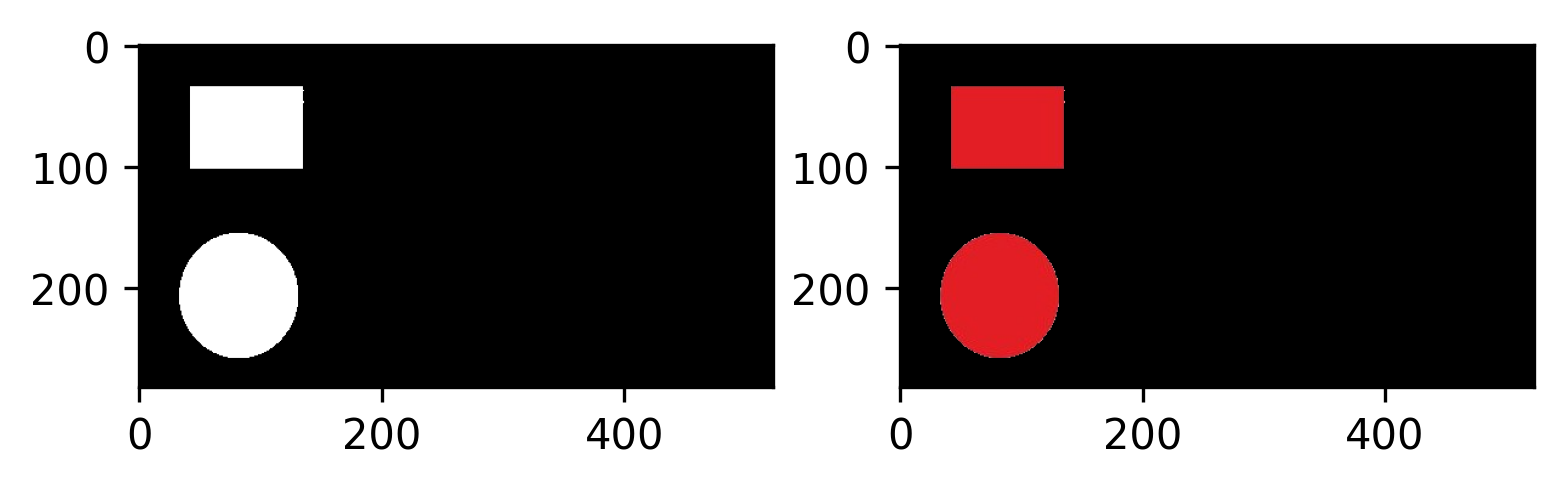

In [16]:
# imprimimos los resultados
plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

## Calculando bordes y la cantidad de objetos localizados en la imagen

### Calculando bordes Canny

Retomando la imagen suacizada y en escala de grises anteriormente realizada, procederemos con la eliminacion de bordes no continuos con con la supresión non-maximun y aplicar el umbral por histéresis.
Estos dos procesos se realizan con el método cv2.Canny que admite 3 parametros:
* Imagen: Es la imagen donde queremos detectar los bordes.
* Umbral mínimo
* Umbral máximo

Para que encuentre las figuras de color amarillo se ajustan los umbrales en 0 y 100.

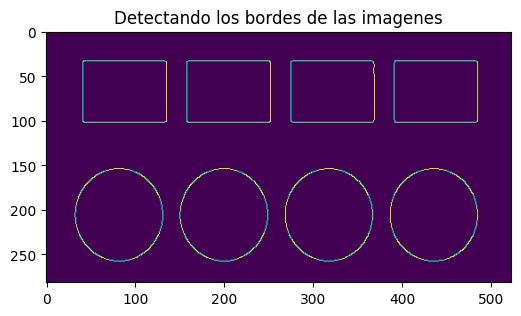

In [17]:
# Calculando los bordes de las imagenes
canny = cv2.Canny(gauss, 0, 100)
# Graficando
plt.figure(dpi=100)
plt.title('Detectando los bordes de las imagenes')
plt.imshow(canny)
plt.show()

### Dibujar y detectar contornos
Por último, usaremos el método cv2.findContours() se detectan los contornos. Solo trabajaremos con los contornos externos, usando la función cv2.RETR-EXTERNAL y se hace una aproximación para eliminar los píexeles del contorno redundantes usando la función cv2.CHAIN_APPROX_SIMPLE.

Con el último método nos devuelve una lista de contornos detectados y la cantidad de estos.

In [18]:
# Detectar y dibujar contornos
# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv2.drawContours(imagen_rgb,contornos,-1,(0,0,255), 2)
#cv2.imshow("contornos", imagen_rgb) 

He encontrado 8 objetos


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Por último mostramos todos los contornos encontrados en el código anterior. Los contornos se suman a la imagen original.

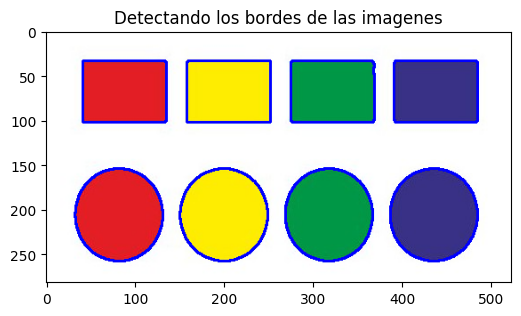

In [19]:
# Graficando
plt.figure(dpi=100)
plt.title('Detectando los bordes de las imagenes')
plt.imshow(imagen_rgb)
plt.show()

## Conclusiones
Con esta tarea voy aplicando los conocimientos adquiridos del semestre, fue una muy buena tarea con el hecho de plantearnos nosotros mismos nuestros propios problemas, lo cual me ayudó a comprender cosas que no había entendido y saber tambíen que tanto comprendí del curso.

Intenté aplicar todos los conceptos posibles y crear ejemplos visuales para comprender mejor los conceptos y técnicas para el tratamiento de las imagenes.